In [88]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set(rc={'figure.figsize':(17.0,27.5)})
sns.set(font_scale=1.25)
results ={}
quantizers = ['ffp162', 'ffp164', 'ffp168']
keys = ['baseline', 'conv1', 'maxpool1', 'conv2', 'maxpool2', 'dense3', 'dense4']
mean_accuracies = list()
mean_times = list()
mean_accuracies_difference = list()
for key in keys:
    mean_acc_of_quant = list()
    mean_time_of_quant = list()
    mean_dif = list()
    for quantizer in quantizers:
        with open ("ffp_results/results_lenet_{0}_{1}.pkl".format(quantizer, key), 'rb') as fp:
            results[key] = pickle.load(fp)
            mean_acc_of_quant.append(results[key]['eval_trimmed_mean_accuracy'])
            mean_time_of_quant.append(results[key]['avg_train_trimmed_mean_time'])
            mean_dif.append(results['baseline']['eval_trimmed_mean_accuracy']-results[key]['eval_trimmed_mean_accuracy'])
    mean_accuracies.append(mean_acc_of_quant)
    mean_times.append(mean_time_of_quant)
    mean_accuracies_difference.append(mean_dif)
print(mean_accuracies)
print(mean_times)

[[0.988425001502037, 0.988425001502037, 0.988425001502037], [0.11349999904632568, 0.9851125031709671, 0.9849375039339066], [0.9873374998569489, 0.988425001502037, 0.9883124977350235], [0.11349999904632568, 0.9871499985456467, 0.9854499995708466], [0.9884249940514565, 0.988475002348423, 0.988037496805191], [0.11349999904632568, 0.950812503695488, 0.9759000092744827], [0.09799999743700027, 0.9880375042557716, 0.9878999963402748]]
[[238.764133343735, 238.764133343735, 238.764133343735], [164.43048306027777, 154.28802219613863, 253.70505681136274], [725.0525330626115, 176.84829365574114, 271.02821060299175], [168.3624471342191, 154.64947089938505, 278.0838151473872], [182.43843829934485, 158.0948847437685, 210.4426307992544], [172.30819837944, 164.41852826772083, 183.75853003140946], [195.10242629080312, 163.2796101916174, 169.18612674763426]]


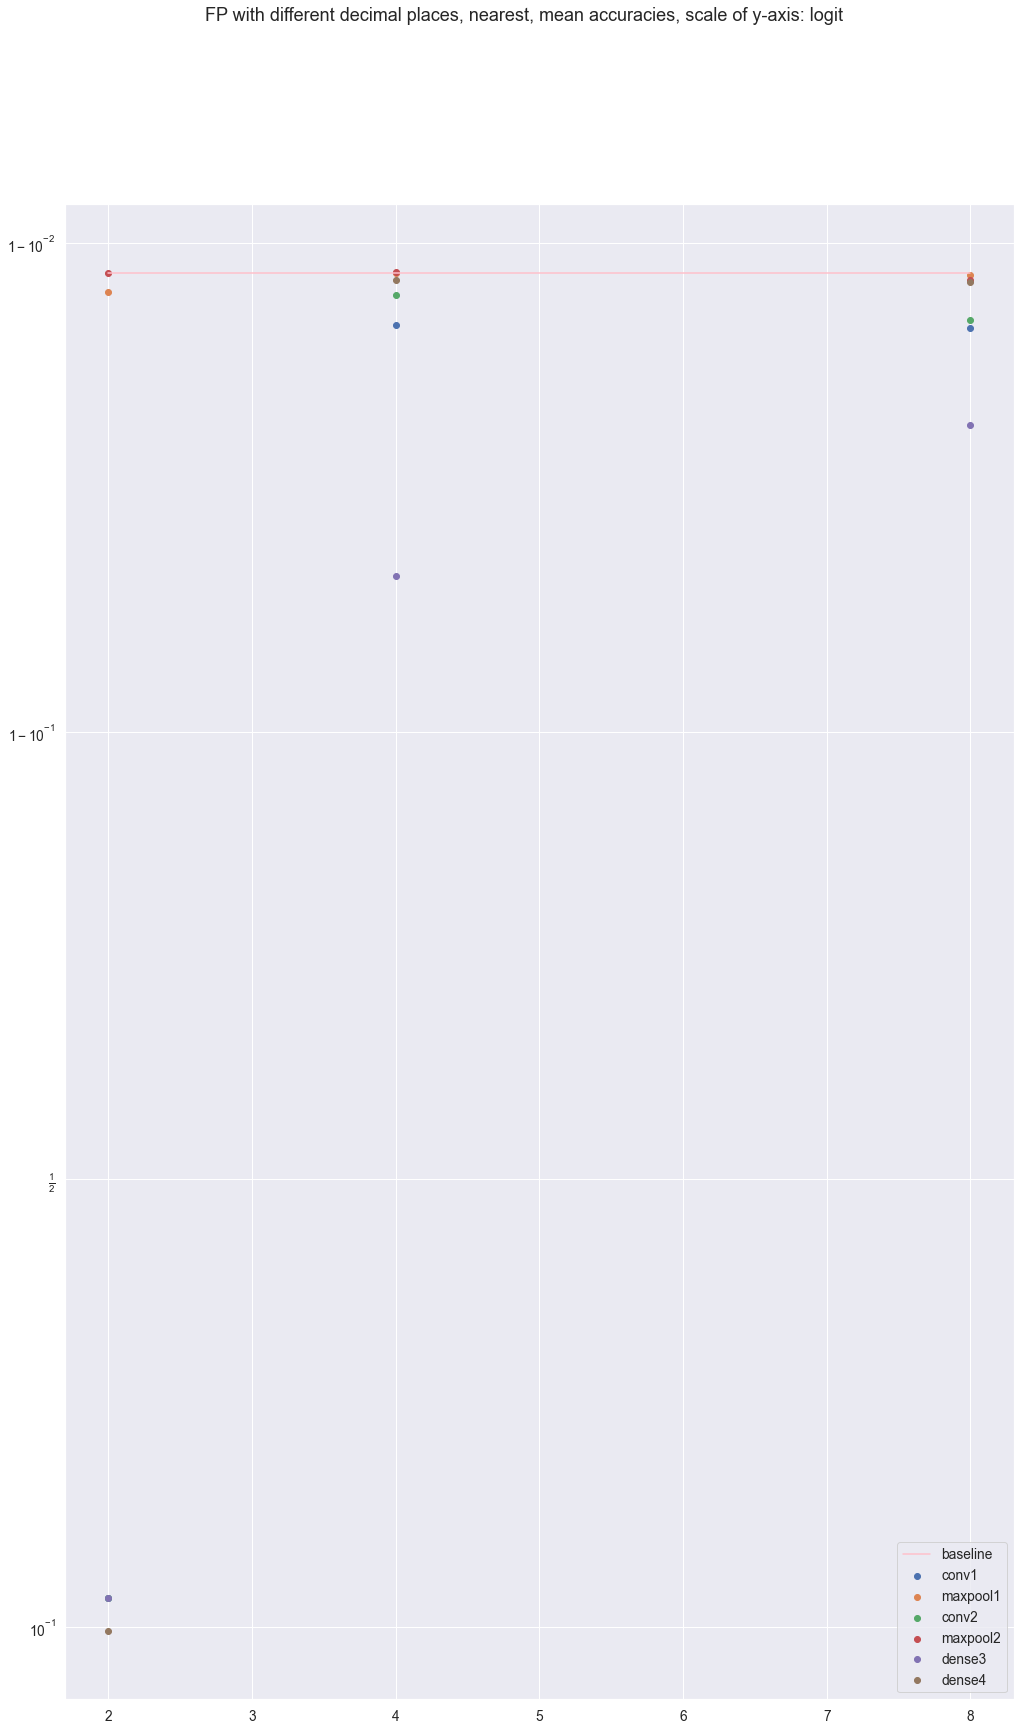

In [89]:
plt.figure()
plt.suptitle('FP with different decimal places, nearest, mean accuracies, scale of y-axis: logit')
gridx = 2
gridy = 5
quantizer_val = [2, 4, 8]
for i in range (1, len(mean_accuracies)):
    plt.scatter(quantizer_val, mean_accuracies[i], label = keys[i])
    plt.yscale('logit')
plt.plot(quantizer_val, mean_accuracies[0], label = "baseline", color = "pink")
plt.legend()

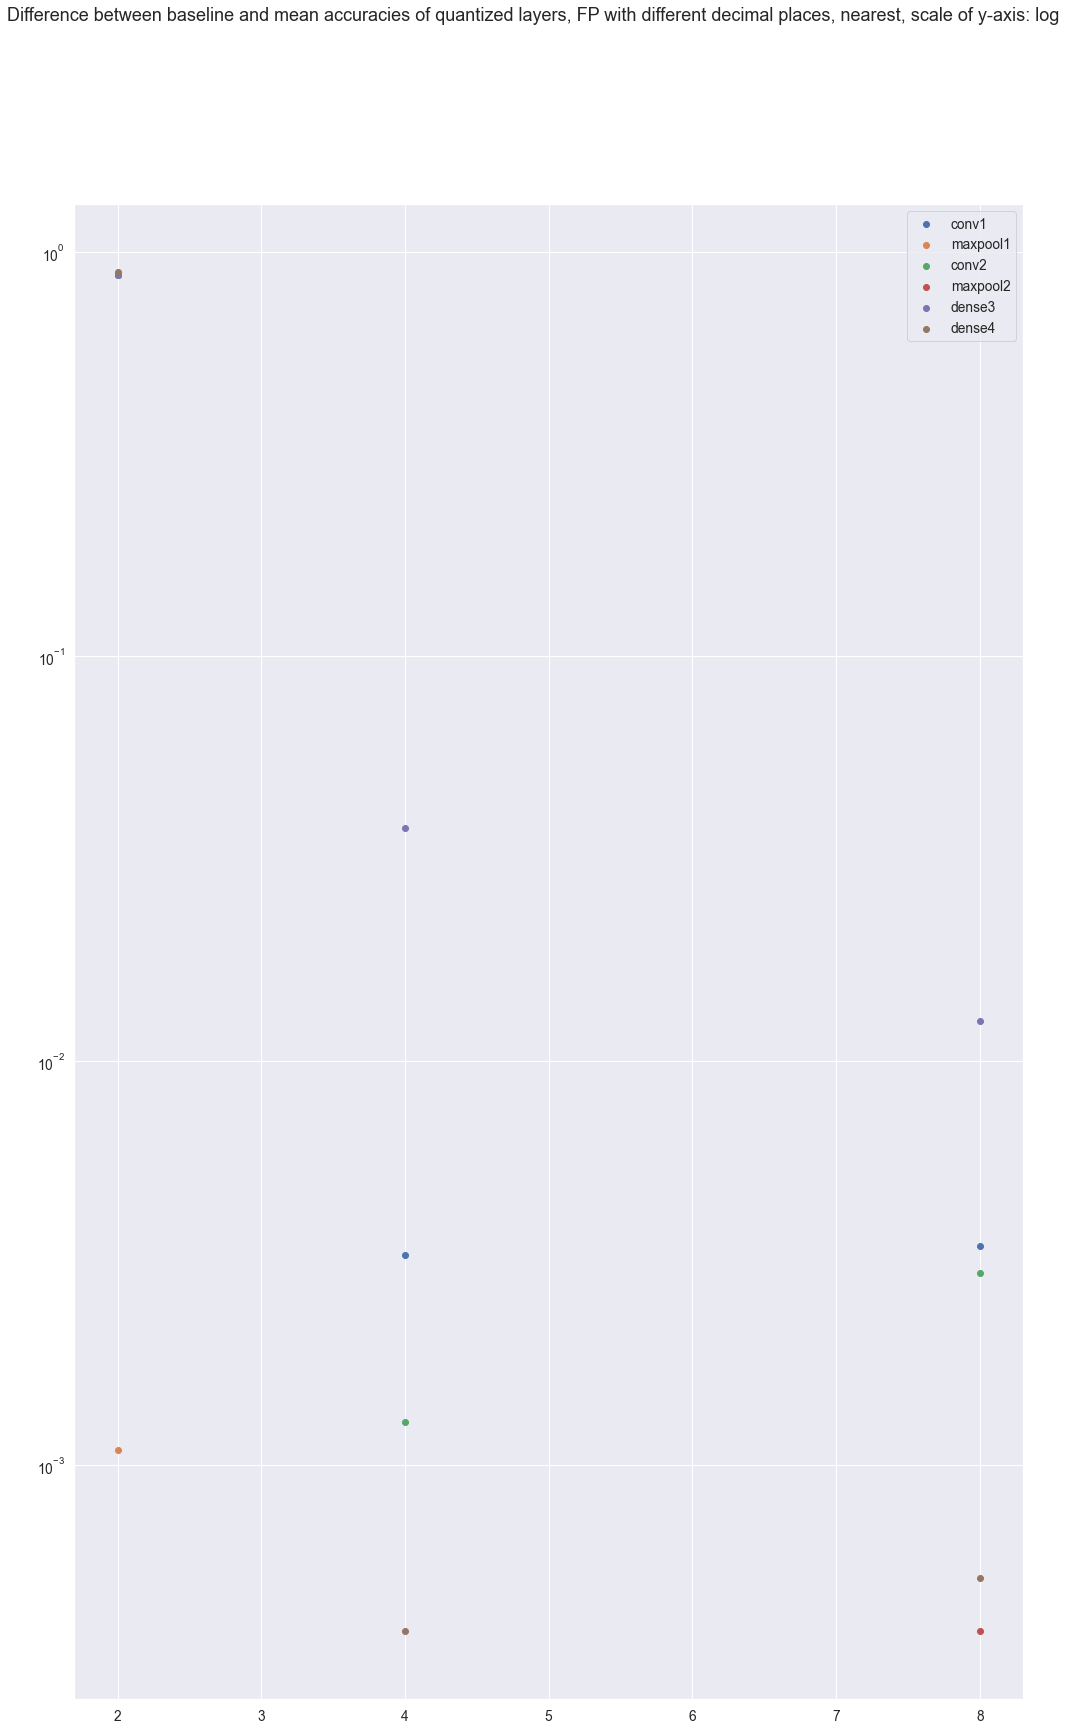

In [90]:
plt.figure()
plt.suptitle('Difference between baseline and mean accuracies of quantized layers, FP with different decimal places, nearest, scale of y-axis: log')
gridx = 2
gridy = 5
quantizer_val = [2, 4, 8]
for i in range (1, len(mean_accuracies)):
    plt.scatter(quantizer_val, mean_accuracies_difference[i], label = keys[i])
    plt.yscale('log')
plt.legend()

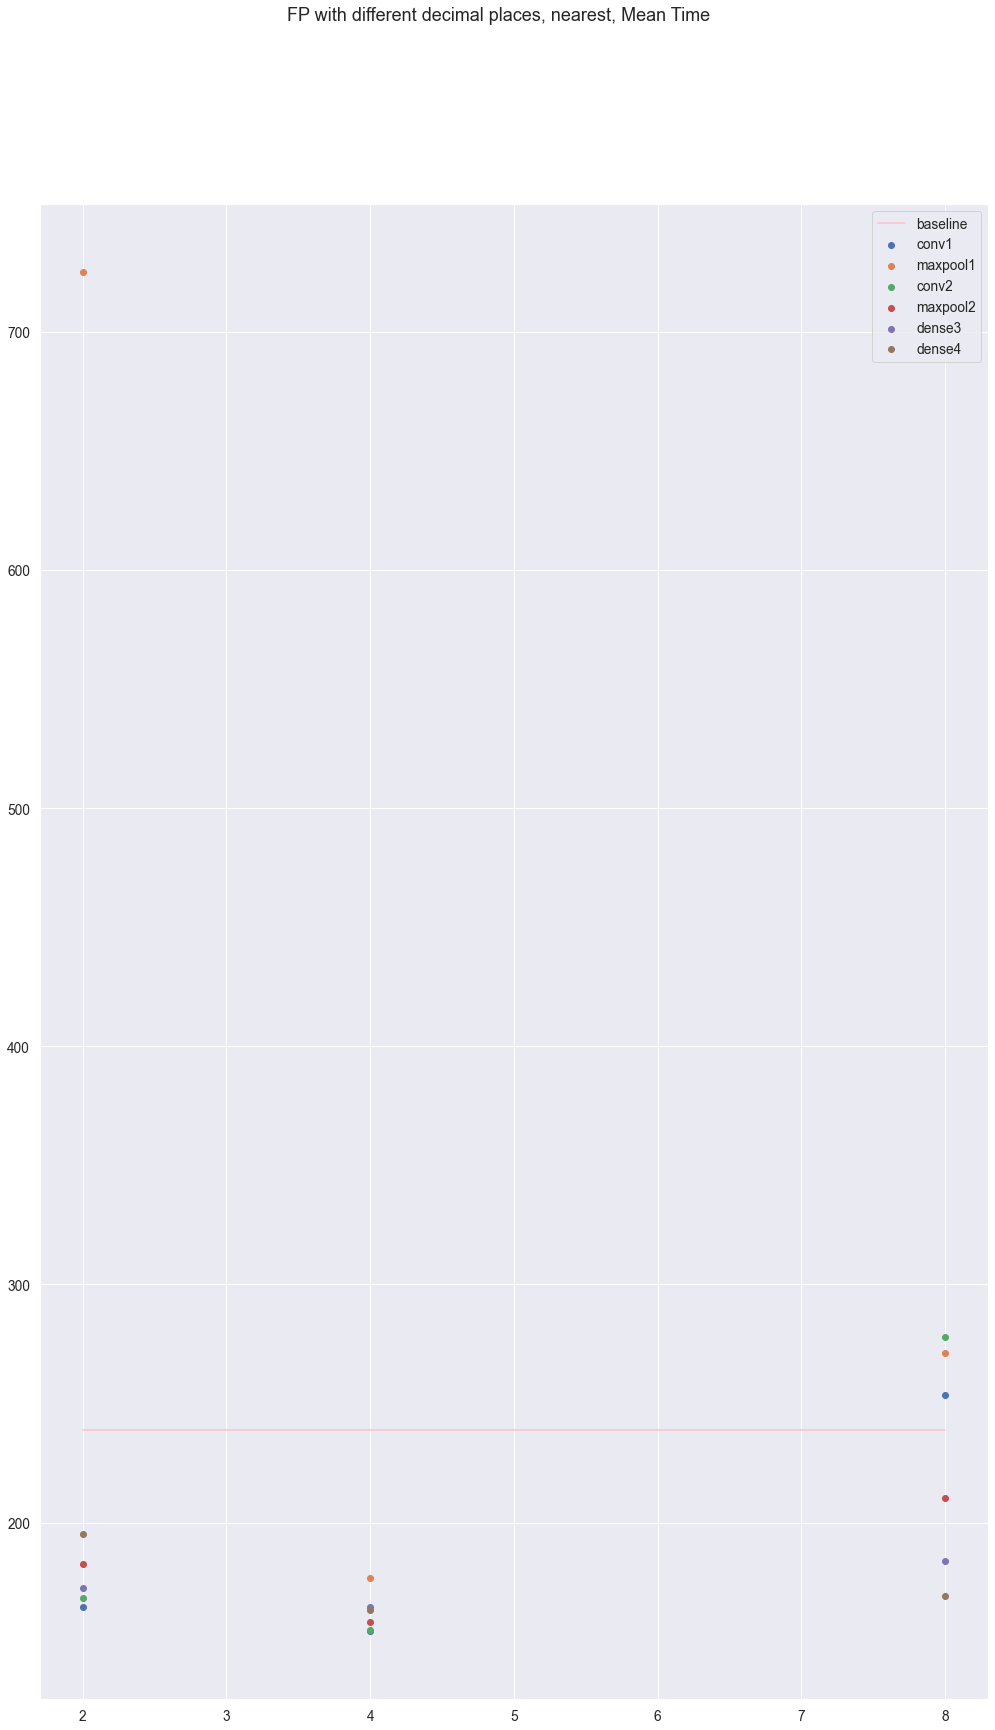

In [91]:
plt.figure()
plt.suptitle('FP with different decimal places, nearest, Mean Time')
gridx = 2
gridy = 5
quantizer_val = [2, 4, 8]
for i in range (1, len(mean_times)):
    plt.scatter(quantizer_val, mean_times[i], label = keys[i])
    plt.yscale('linear')
plt.plot(quantizer_val, mean_times[0], label = "baseline", color = "pink")
plt.legend()